# Flight Price Prediction

In this project, we engage in an Exploratory Data Analysis of flight data extracted from the EaseMyTrip website. The dataset encompasses flight particulars documented over a 50-day period, ranging from February 11th to March 31st, 2022. With a dataset size of 300,152 records and 11 distinct attributes, our primary objective is to derive insightful patterns through an extensive analysis and subsequently construct a predictive model for flight prices.

#### The Features

1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

### Importing all the required libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Clean_Dataset.csv',index_col=0)

In [3]:
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## EDA with help of few research questions

### 1. How much does different airlines charge for the different classes

<AxesSubplot:xlabel='airline', ylabel='price'>

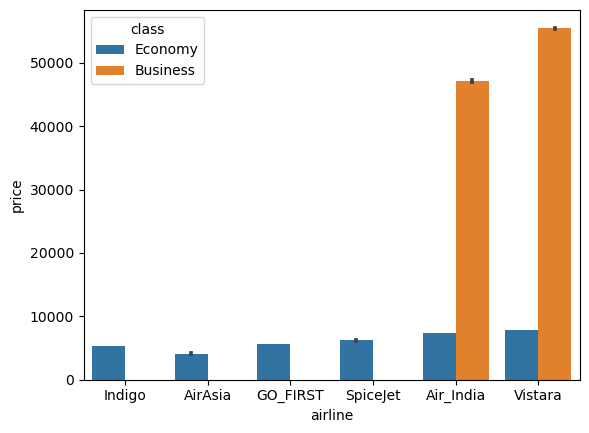

In [6]:
sns.barplot(x='airline',y='price',data=df.sort_values('price'),hue='class')

- Business class flights are exclusively offered by two companies: Air India and Vistara. Notably, a substantial price differential exists between these two classes, with Business class tickets commanding nearly five times the cost of Economy tickets.

### 2. How does the price vary with airlines for the two different class

Text(0.5, 1.0, 'Price variation based on different airlines (Buisness)')

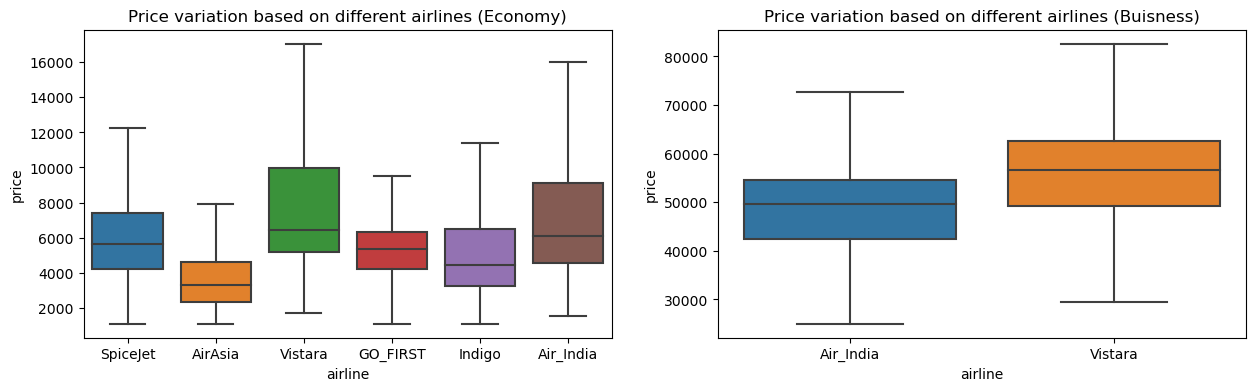

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='airline',y='price',data=df[df['class']=='Economy'],showfliers=False).set_title('Price variation based on different airlines (Economy)',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(y='price',x='airline',data=df.loc[df['class']=='Business'],showfliers=False).set_title('Price variation based on different airlines (Buisness)',fontsize=12)

- The graph illustrates subtle variations among the featured airlines. Notably, AirAsia offers comparatively budget-friendly fares, while Air India and Vistara display slightly higher pricing. Furthermore, Vistara's business class tickets appear to command a slight premium compared to Air India's offerings.

### 3.  How does the mean price of ticket increase with respect to days left of departure for economy class

<AxesSubplot:xlabel='days_left', ylabel='price'>

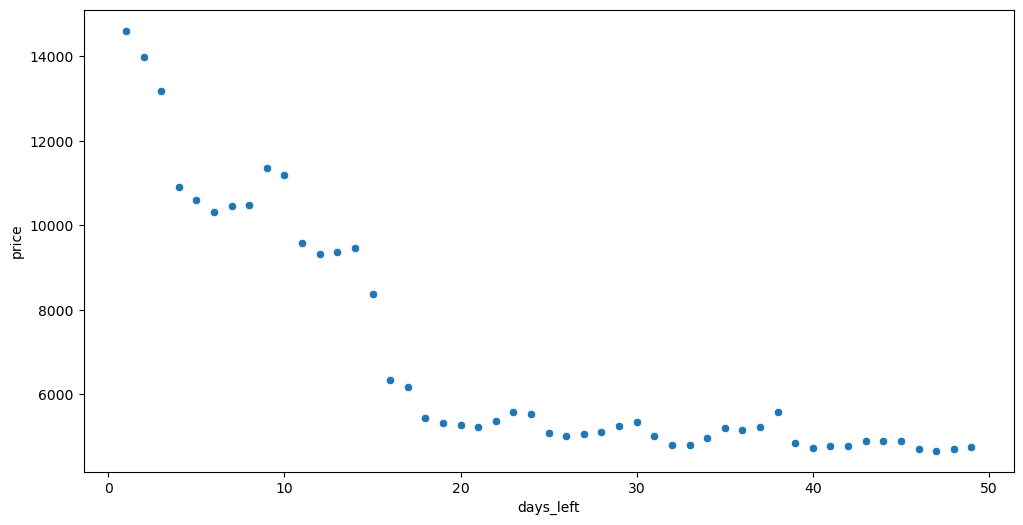

In [8]:
plt.figure(figsize=(12,6))
df_temp = df[df['class']=='Economy'].groupby('days_left')['price'].mean().reset_index()
sns.scatterplot(y='price',x='days_left',data=df_temp)

<AxesSubplot:xlabel='days_left', ylabel='price'>

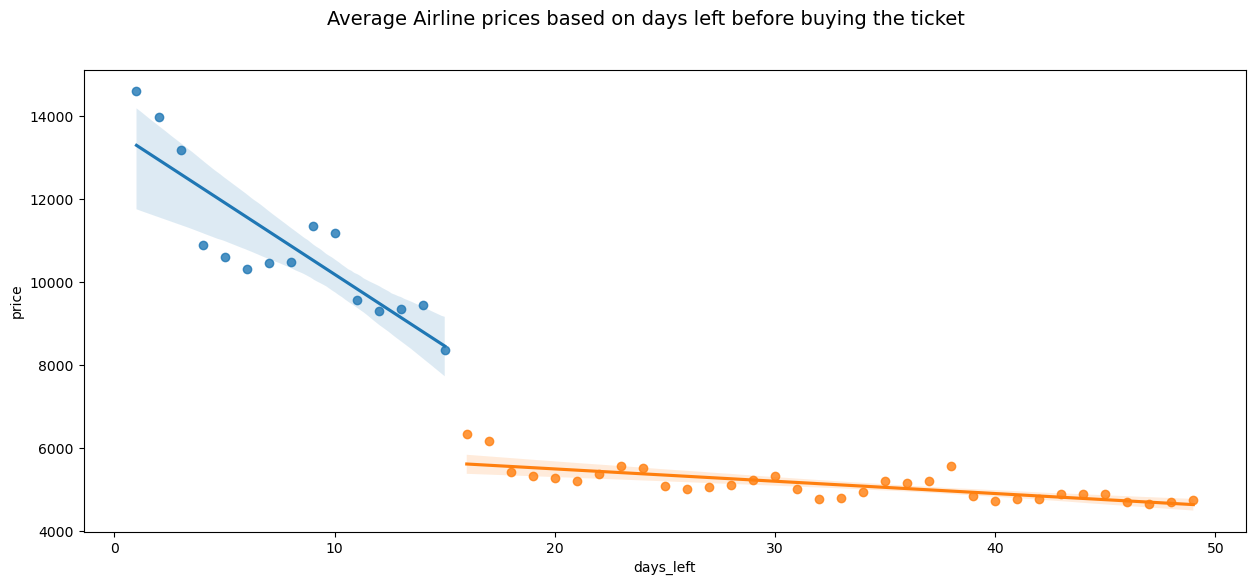

In [9]:
plt.figure(figsize=(15,6)).suptitle('Average Airline prices based on days left before buying the ticket', fontsize=14)
ax = plt.axes()
#sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<16)].days_left, y=df_temp.loc[(df_temp["days_left"]>=1)&(df_temp["days_left"]<16)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=16].days_left, y=df_temp.loc[df_temp["days_left"]>=16].price, fit_reg=True, ax=ax)

- The graphical representation illustrates a gradual price increase followed by a significant upward trend approximately 15 days prior to the flight.

### 4. How does the average price of ticket increase based on flight duration for economy class

Text(0.5, 1.0, 'Average price based on flight duration')

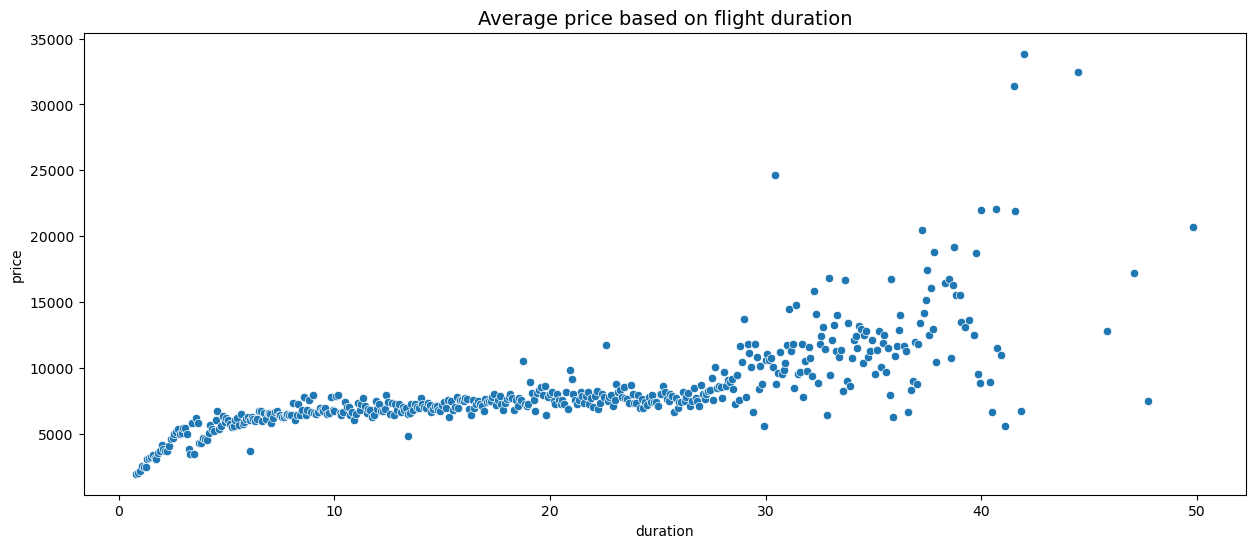

In [10]:
plt.figure(figsize=(15,6))
df_temp = df[df['class']=='Economy'].groupby('duration')['price'].mean().reset_index()
sns.scatterplot(y='price',x='duration',data=df_temp).set_title('Average price based on flight duration',fontsize =14)

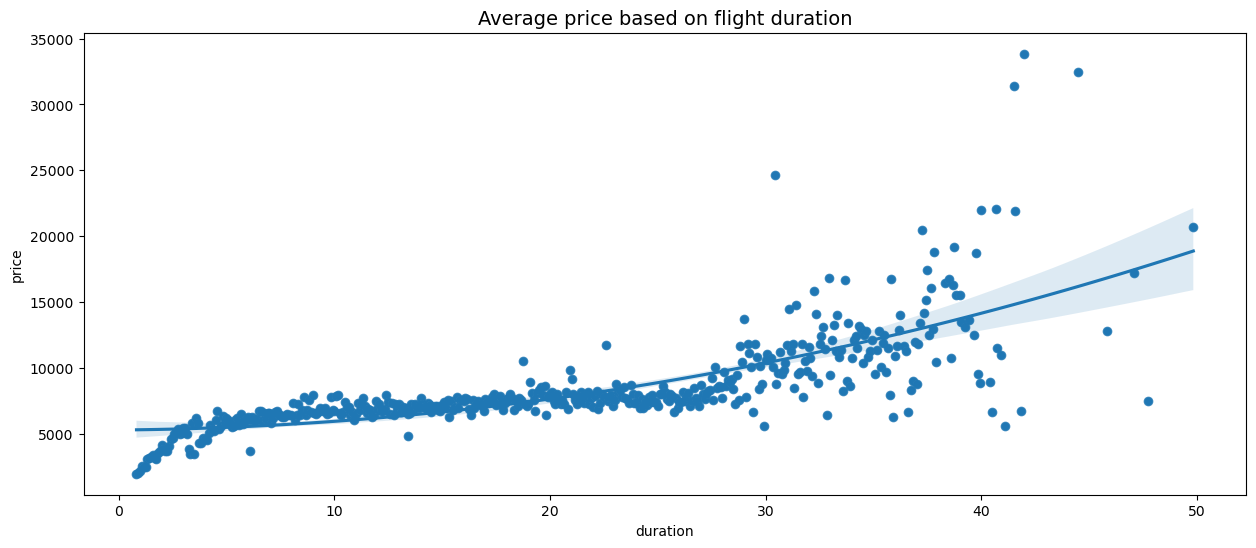

In [11]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average price based on flight duration",fontsize=14)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

- The observed pattern reflects an exponential relationship, which aligns with expectations. Notably, flight prices tend to exhibit higher values for routes with extended durations. 

### 5. How does price change based on the arrival and departure time for economy class

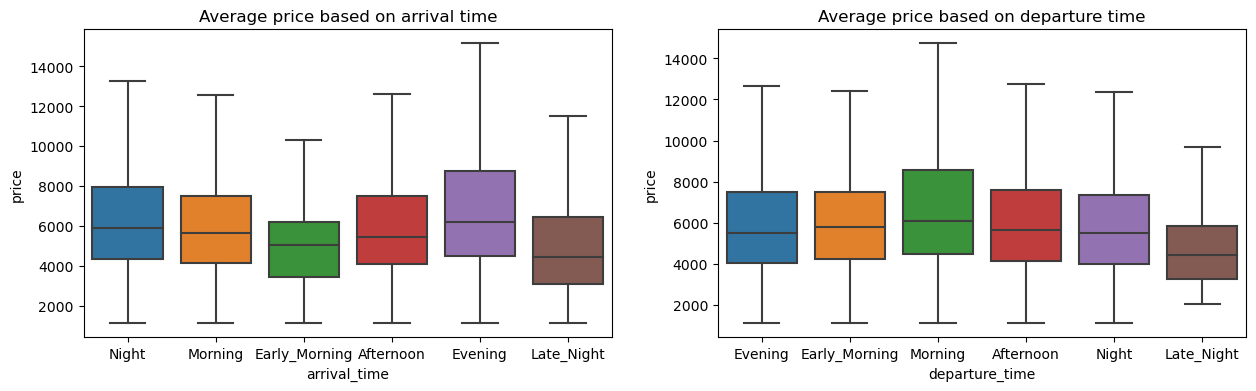

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x='arrival_time',y='price',data=df[df['class']=='Economy'],showfliers=False).set_title('Average price based on arrival time',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='departure_time',y='price',data=df[df['class']=='Economy'],showfliers=False).set_title('Average price based on departure time',fontsize=12)
plt.show()

- As anticipated, traveling during nighttime for departures or arrivals consistently offers the most economical option. Additionally, early morning arrivals exhibit a cost-effective trend, while afternoon flights demonstrate slightly lower fares compared to both evening and nighttime flights.

### 6. How does price vary with destination for economy class

Text(0.5, 1.0, 'Average price based on destination city')

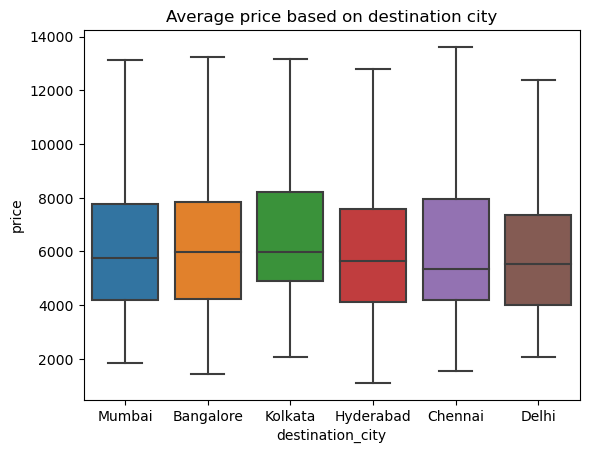

In [13]:
sns.boxplot(x='destination_city',y='price',data=df[df['class']=='Economy'],showfliers=False).set_title('Average price based on destination city',fontsize=12)

<Figure size 1200x900 with 0 Axes>

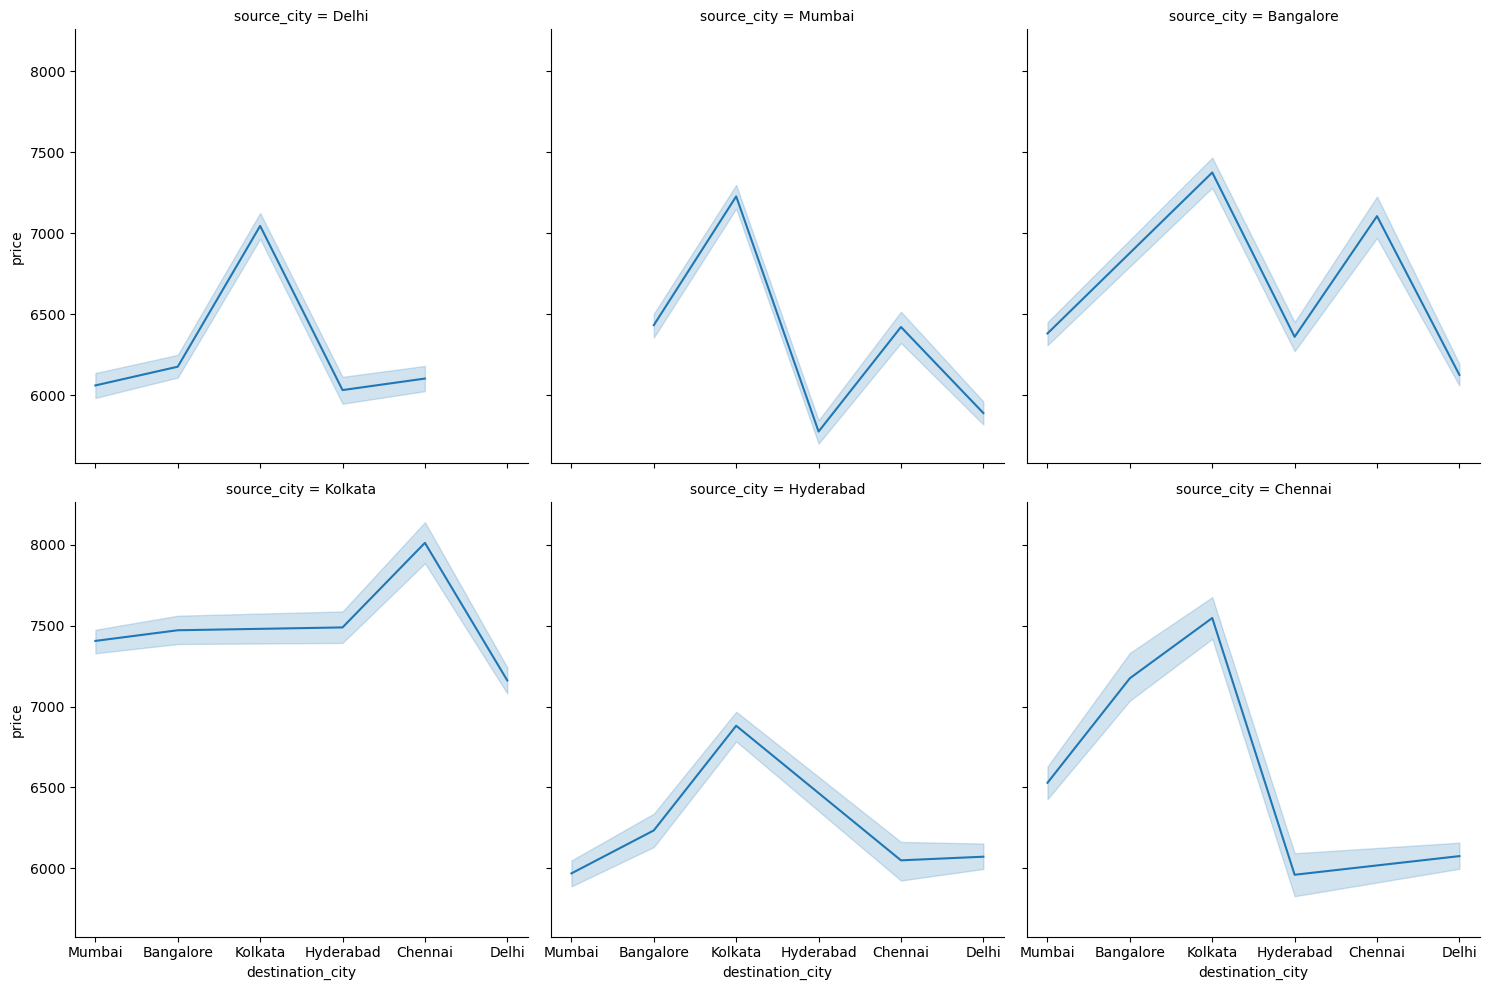

In [14]:
plt.figure(figsize=(12,9))
sns.relplot(data=df[df['class']=='Economy'], x="destination_city", y="price", col="source_city", kind="line",col_wrap=3)

#sns.relplot(data=df, x="destination_city", y="price", col="source_city",hue="class", style="class", kind="line",col_wrap=3)

- The analysis suggests that flights departing from Delhi tend to exhibit lower fares compared to other source cities. Furthermore, the capital city, being a hub of extensive air travel options, showcases cost-effective rates for destinations. On the contrary, ticket prices exhibit a consistent trend across various routes, with Hyderabad emerging as a relatively pricier destination. 

### 7. How price varies based on number of stops 

Text(0.5, 1.0, 'Price variation based on number of stops for different airlines (Business)')

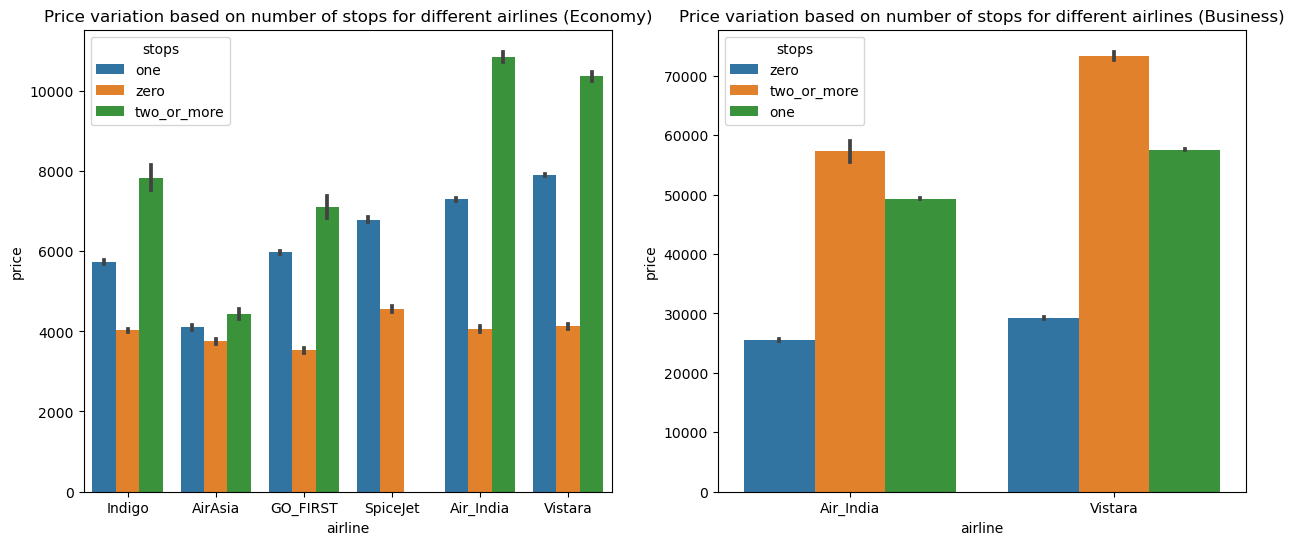

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='airline',y='price',data=df[df['class']=='Economy'].sort_values('price'),hue='stops').set_title('Price variation based on number of stops for different airlines (Economy)',fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='airline',y='price',data=df[df['class']=='Business'].sort_values('price'),hue='stops').set_title('Price variation based on number of stops for different airlines (Business)',fontsize=12)

- The analysis reveals a distinct trend in flight prices based on the number of stops. Generally, flights with more stops demonstrate higher costs, a trend consistent across most airlines. However, an interesting anomaly is observed with AirAsia, where prices exhibit relatively consistent behavior regardless of the number of stops. This unique pattern suggests AirAsia's affiliation with the low-cost carrier category.

## Converting all the categorical variables to numerical variables

In [16]:
from sklearn.preprocessing import OneHotEncoder

data = df.copy()

def preprocessing(df):
    # Defining the columns for which we want to create dummy variables
    categorical_features = ["airline", "source_city", "destination_city", "departure_time", "arrival_time", "stops", "class"]
    
    encoder = OneHotEncoder(drop='first')
    
    encoded_features = encoder.fit_transform(df[categorical_features]).toarray()
    
    feature_names = encoder.get_feature_names_out(categorical_features)
    
    # Creating a new DataFrame with the encoded features and concatenating it with the original DataFrame
    df_encoded = pd.DataFrame(encoded_features, columns=feature_names)
    df = pd.concat([df, df_encoded], axis=1)
    
    # Dropping the original columns used for encoding
    df = df.drop(categorical_features + ["flight"], axis=1)
    
    return df


In [17]:
df_ohe = preprocessing(data)

In [18]:
df_ohe

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,stops_two_or_more,stops_zero,class_Economy
0,2.17,1,5953,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,2.33,1,5953,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,2.17,1,5956,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2.25,1,5955,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2.33,1,5955,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
300149,10.42,49,77105,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
300150,13.83,49,79099,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
300151,10.00,49,81585,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_ohe.columns

Index(['duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'stops_two_or_more', 'stops_zero', 'class_Economy'],
      dtype='object')

## Prediction Of Flight Price

In [44]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [45]:
X = df_ohe.drop('price',axis=1).values
y = df_ohe['price']

In [46]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=50)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(201102, 30)
(99051, 30)
(201102,)
(99051,)


### Applying Machine Learing Models to Predict Airline Prices  

#### Linear Regression

In [48]:
lr = LinearRegression()

#Fitting the Linear Regression model
lr.fit(X_train,y_train)

#Prediction based on the model
lr_predictions = lr.predict(X_test)

#### Gradient Boosting

In [26]:
#Fitting the Gradient Boosting model
gbr.fit(X_train,y_train)

#Prediction based on the model
gbr_predictions = gbr.predict(X_test)

#### XGBoost

In [30]:
#Fitting the XGBoost model
#xgb.fit(X_train,y_train)

#Prediction based on the model
#xgb_predictions = xgb.predict(X_test)

In [ ]:
xgb = XGBRegressor()

# Define the hyperparameter grid
xgb_params = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [4, 6, 8, 10],
    'min_child_weight' : [2,4,10,12]
}

# Perform randomized search
random_search = GridSearchCV(xgb, xgb_params, cv=5)
random_search.fit(X_train, y_train)


In [51]:
# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predicting
best_xgb_model_predictions = best_xgb_model.predict(X_test)

#### Random Forest

In [33]:
#Fitting the Random Forest model
#rf.fit(X_train,y_train)

#Prediction based on the model
#rf_predictions = rf.predict(X_test)

In [35]:
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [4,5,6,7,8],
    "max_features": ["auto", "sqrt", "log2"],
    'random_state': [0,1,42]
}
# Predicting
#best_rf_model_predictions = best_rf_model.predict(X_test)

In [36]:
grid_search = RandomizedSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200],
                                        'random_state': [0, 1, 42]})

In [38]:
# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, random_state=1)

In [52]:
best_rf_model_predictions = best_rf_model.predict(X_test)

In [53]:
Pipeline = [lr, gbr, best_xgb_model, best_rf_model]

### Comparing results of the ML Models used

In [54]:
def evaluate_pipeline(pipeline, y_pred_all, model_name):
    score = round((pipeline.score(X_test, y_test)*100), 2)
    mse = round(mean_squared_error(y_test, y_pred_all), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred_all)), 3)
    r2 = round(r2_score(y_test, y_pred_all), 3)
    mae = mean_absolute_error(y_test, y_pred_all)

    metrics = pd.DataFrame({
        'Model Name': model_name,
        'Accuracy(%)': [score],
        'Mean Squared Error (MSE)': [mse],
        'Root Mean Squared Error (RMSE)': [rmse],
        'R-squared (R2-Score)': [r2],
        'Mean Absolute Error (MAE)': [mae]
    })
    return metrics

In [56]:
r1 = evaluate_pipeline(lr, lr_predictions, 'Linear Regression')
r2 = evaluate_pipeline(gbr,gbr_predictions, 'Gradient Boosting Regression')
#r3 = evaluate_pipeline(best_gb_model,best_gb_model_predictions, 'Best Gradient Boosting Regression')
#r4 = evaluate_pipeline(xgb, xgb_predictions, 'XGBoost')
r5 = evaluate_pipeline(best_xgb_model, best_xgb_model_predictions, 'Best XGBoost')
#r6 = evaluate_pipeline(rf, rf_predictions, 'Random Forest')
r7 = evaluate_pipeline(best_rf_model, best_rf_model_predictions, 'Best Random Forest')


all_results = pd.concat([r1, r2, r5, r7], ignore_index=True)
all_results

,Model Name,Accuracy(%),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2-Score),Mean Absolute Error (MAE)
0,Linear Regression,91.25,4.525710e+07,6727.340,0.913,4559.769619
1,Gradient Boosting Regression,95.33,2.416396e+07,4915.685,0.953,2958.347871
2,Best XGBoost,98.79,6.235363e+06,2497.071,0.988,1261.693182
3,Best Random Forest,95.33,2.417557e+07,4916.866,0.953,2831.531818


### Conclusion

- Among the models considered, the XGBRegressor demonstrated the most promising performance, showcasing a R-squared score of 0.988 and a low Mean Absolute Error (MAE) of 1261.69 on the test dataset.

### Airline Price Prediction using Artificial Neural Network ( Additional )

In [64]:
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [65]:
y = np.ravel(y).astype('float32').reshape(-1,1)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=101)

In [66]:
scaler_x = MinMaxScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [70]:
model = Sequential()

# input layer
model.add(Dense(156, activation='relu'))

# hidden layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(units=1,activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam')

In [71]:
model.fit(x=X_train, 
          y=y_train,
          epochs=25,
          batch_size=30,
          validation_data=(X_test, y_test))

Epoch 1/25
6704/6704 [==============================] - 17s 2ms/step - loss: 0.0033 - val_loss: 0.0019
Epoch 2/25
6704/6704 [==============================] - 14s 2ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 3/25
6704/6704 [==============================] - 14s 2ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 4/25
6704/6704 [==============================] - 16s 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/25
6704/6704 [==============================] - 14s 2ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 6/25
6704/6704 [==============================] - 13s 2ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/25
6704/6704 [==============================] - 14s 2ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/25
6704/6704 [==============================] - 13s 2ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/25
6704/6704 [==============================] - 13s 2ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 10/25
6704/6704 [==============================] - 13s 2ms/step - l

In [72]:
# Checking the accuracy of the model
result = model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result

print(f"Accuracy: {round((accuracy_ANN)*100, 2)}%")

3096/3096 [==============================] - 3s 899us/step - loss: 0.0013
Accuracy: 99.87%


In [73]:
# Checking the r2 score of the ANN model
model_prediction = model.predict(X_test)

r2_score(y_test,model_prediction)

3096/3096 [==============================] - 3s 985us/step


0.965164279461879

### End of Notebook